In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# Hide warnings output
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
os.environ['PYTHONWARNINGS']="ignore"

In [24]:
train = pd.read_csv('heart-disease2.csv')

In [25]:
train.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Hypothesis: There are outliers in the data for both maximum and minimum values.

Let's look at the data

In [26]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


<Axes: xlabel='HeartDisease', ylabel='count'>

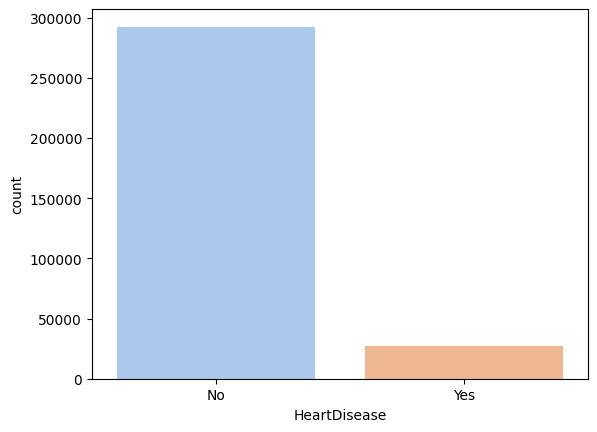

In [27]:
sns.countplot(x='HeartDisease',data=train,palette='pastel')

In [28]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


In [29]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

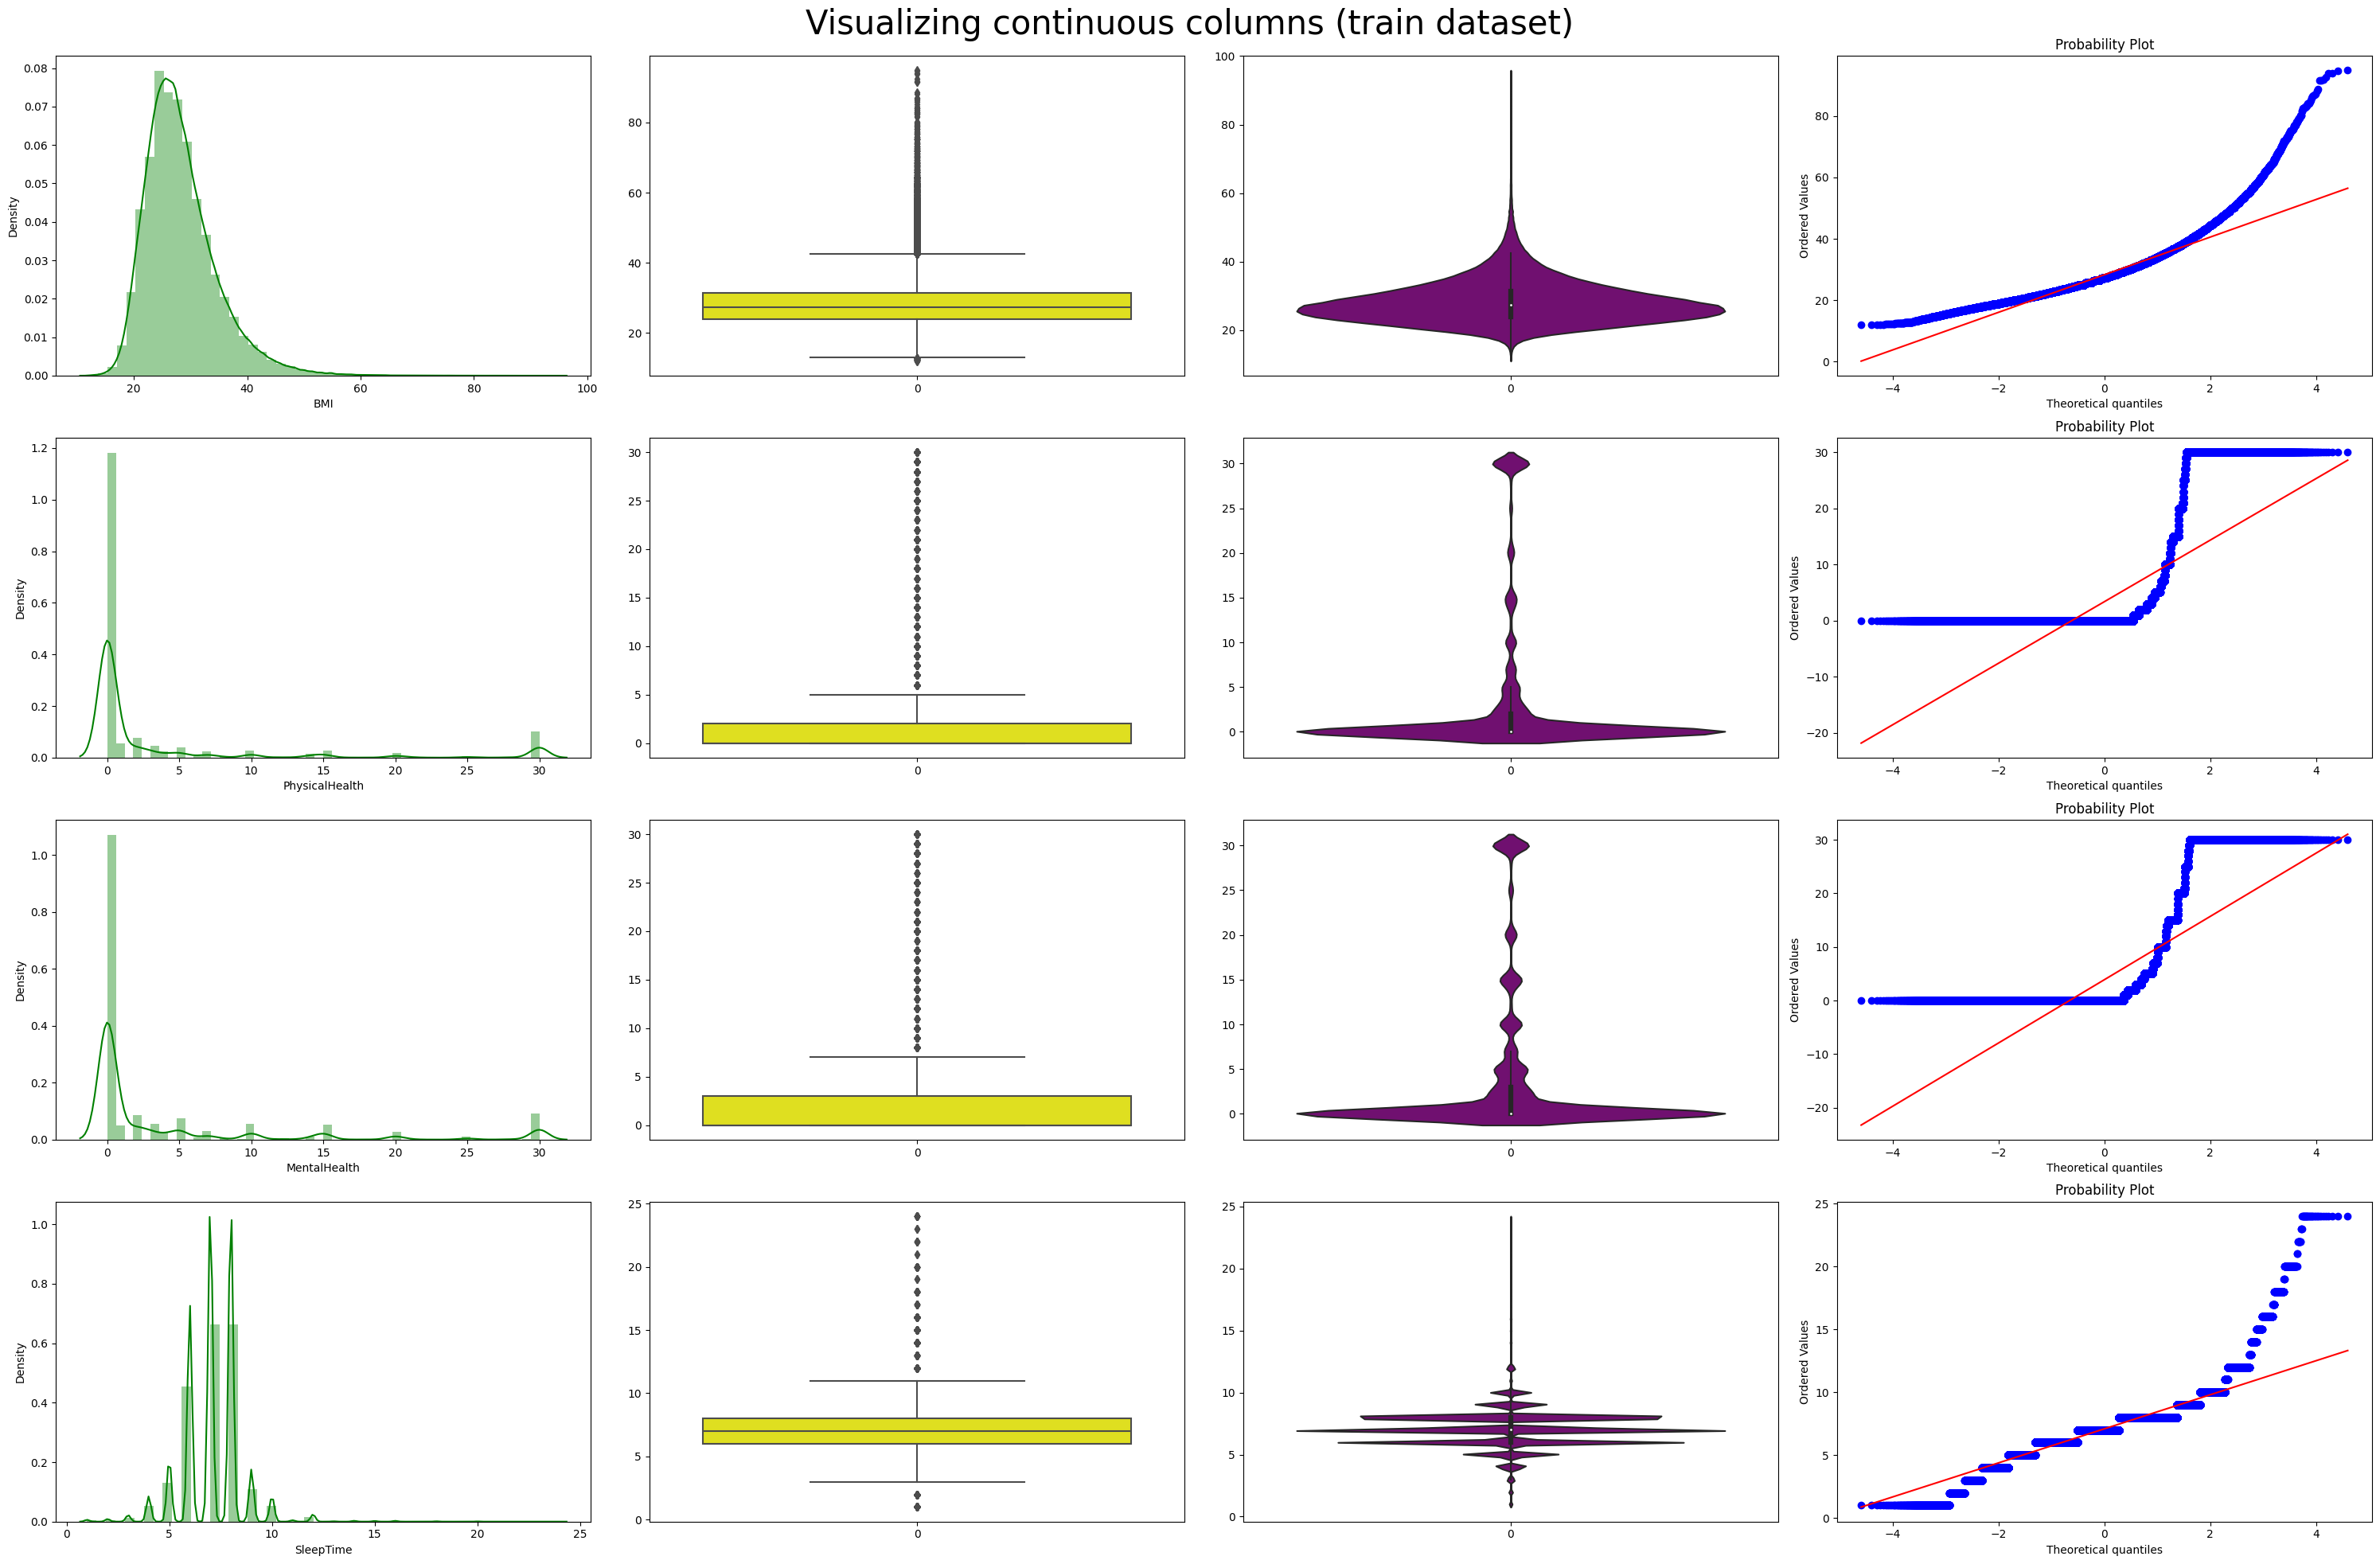

In [30]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    sns.violinplot(train[i],ax=ax[index,2],color='purple')
    stats.probplot(train[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

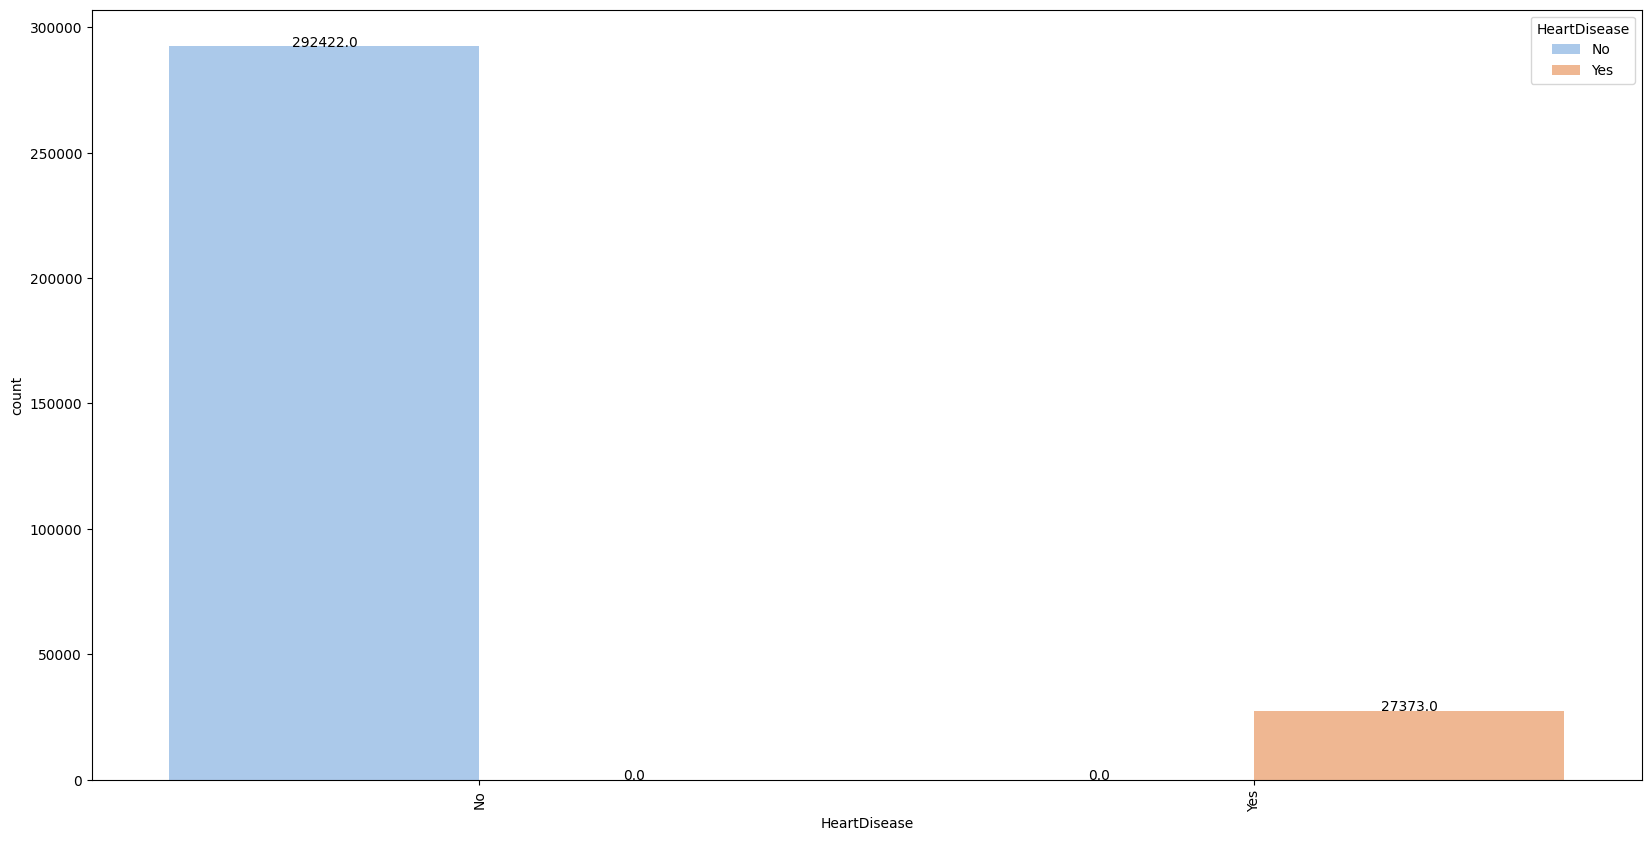

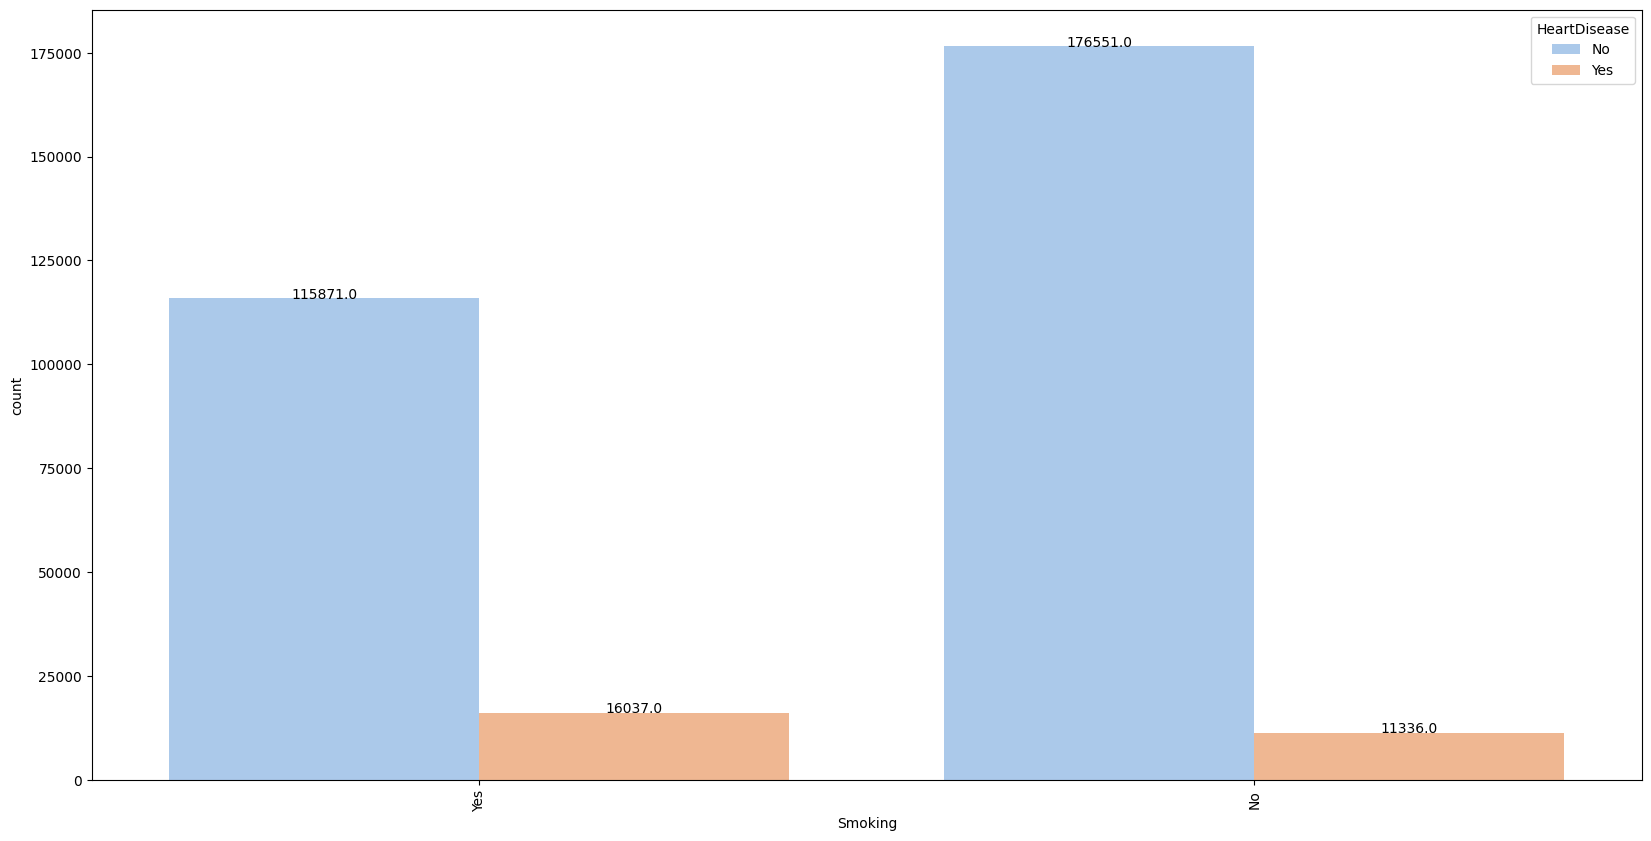

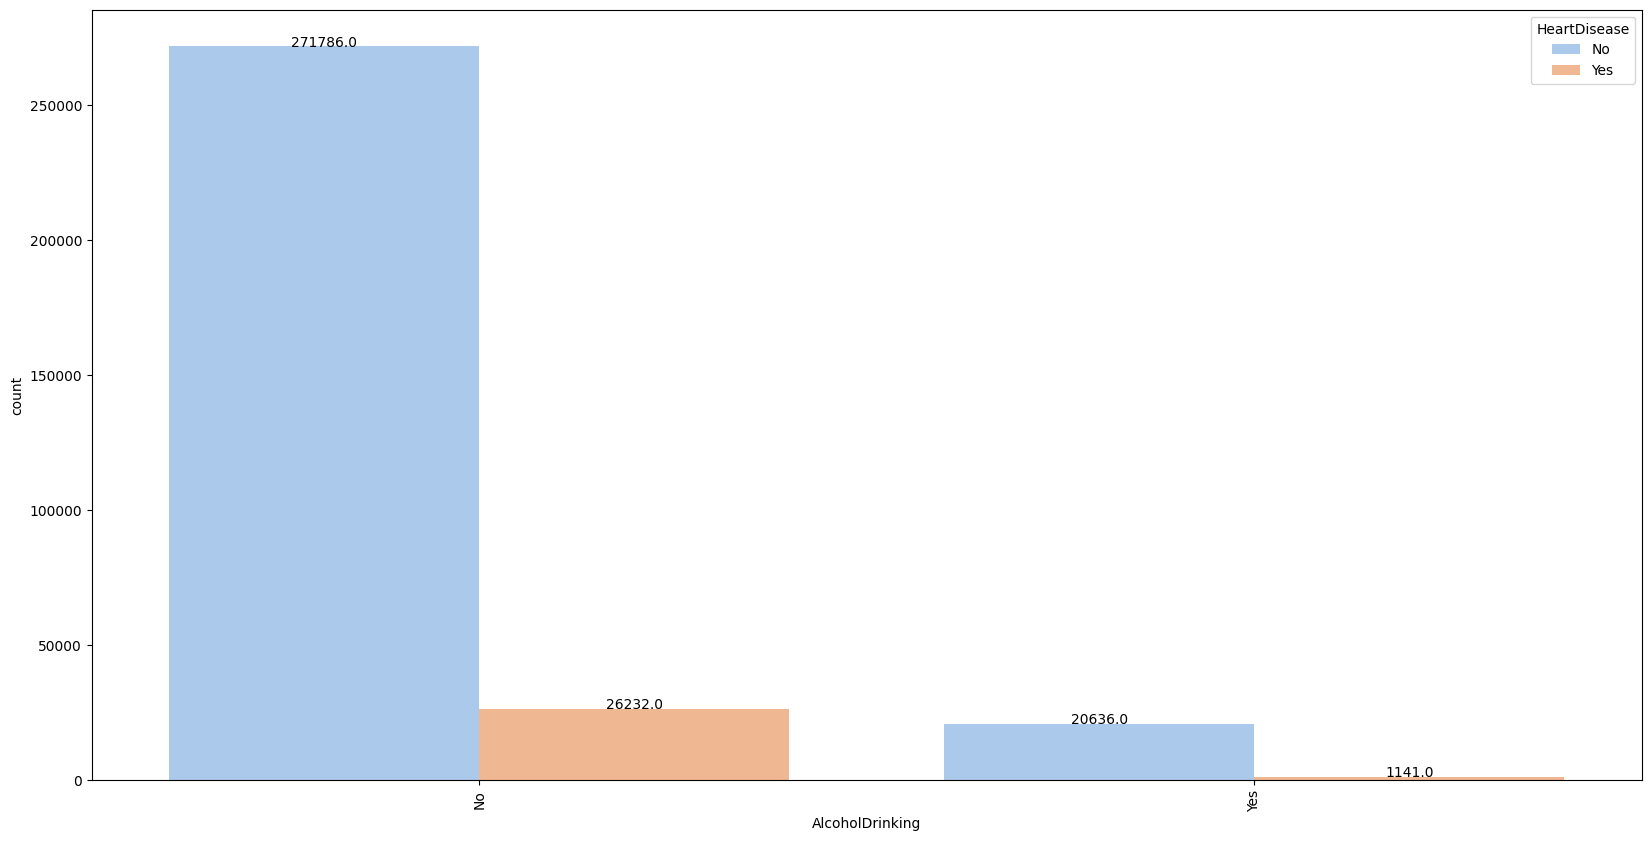

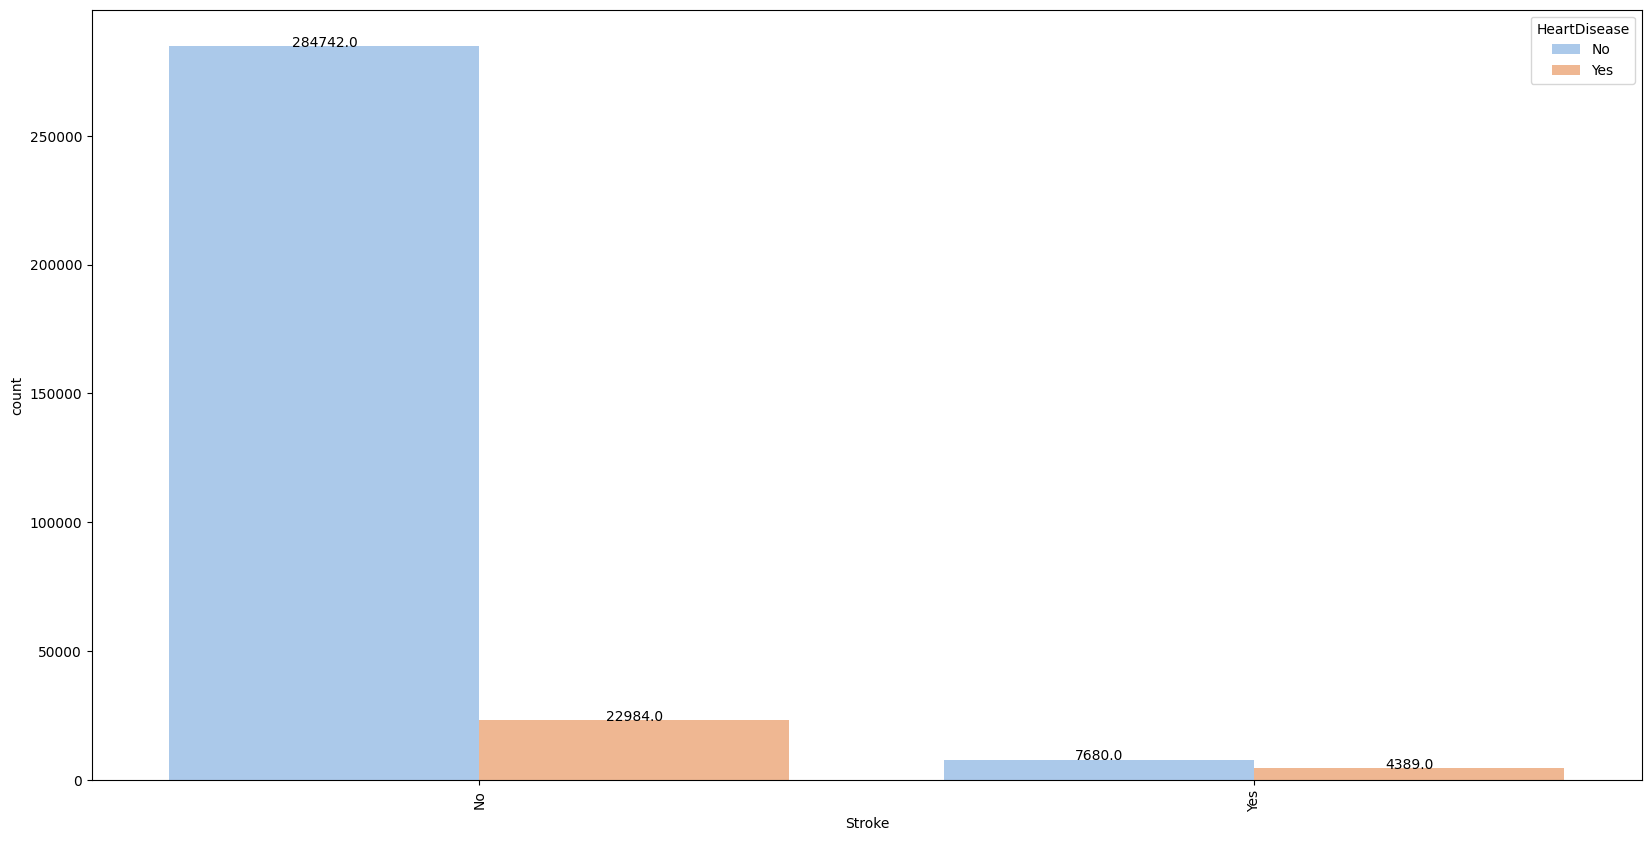

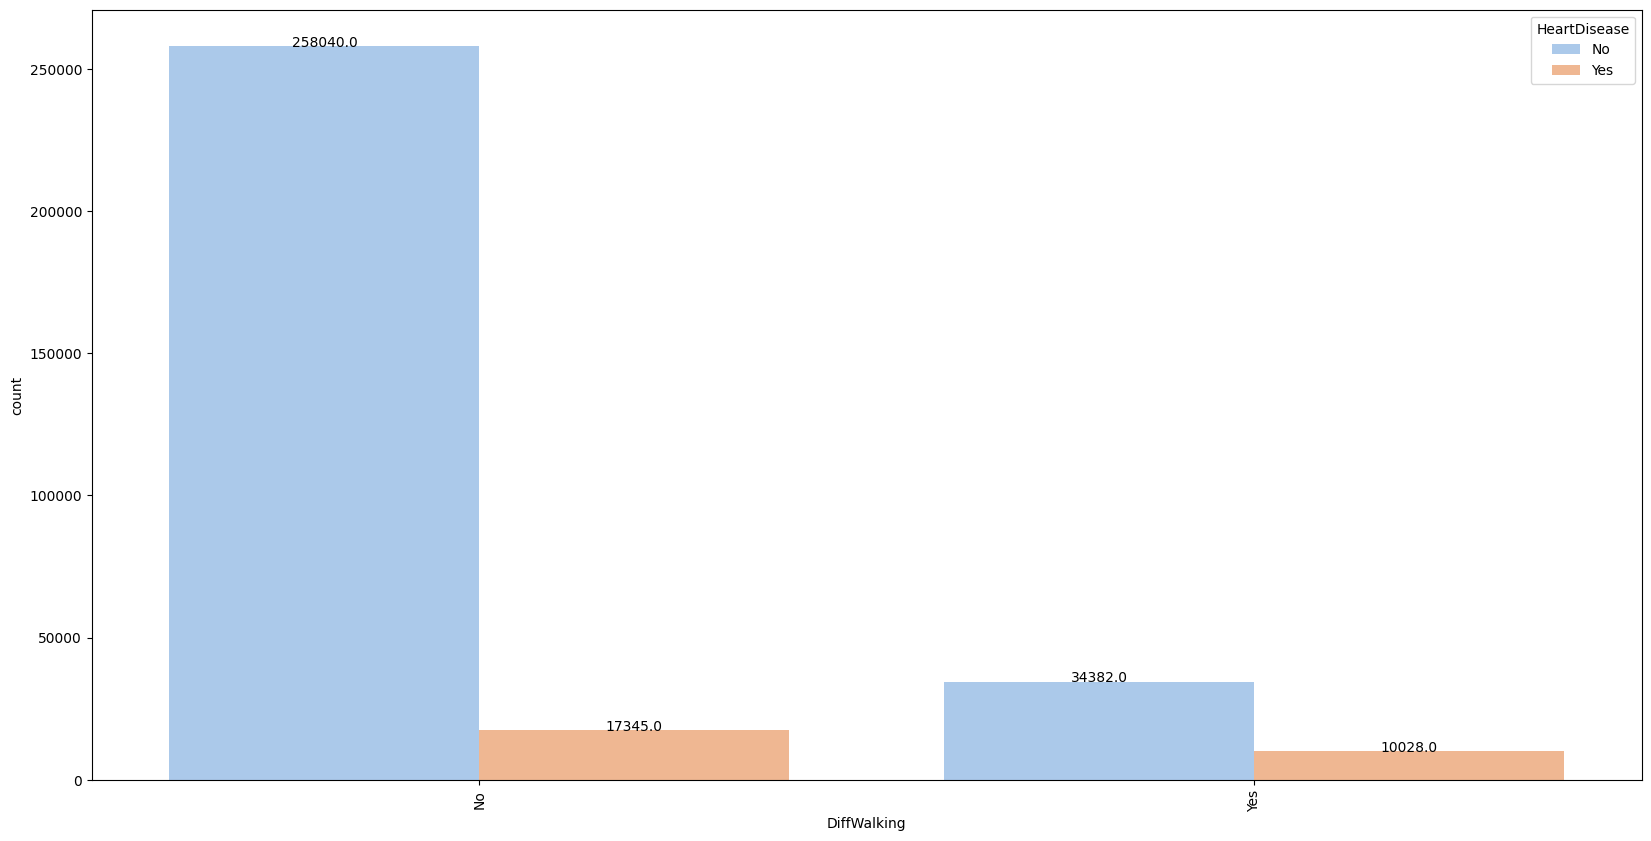

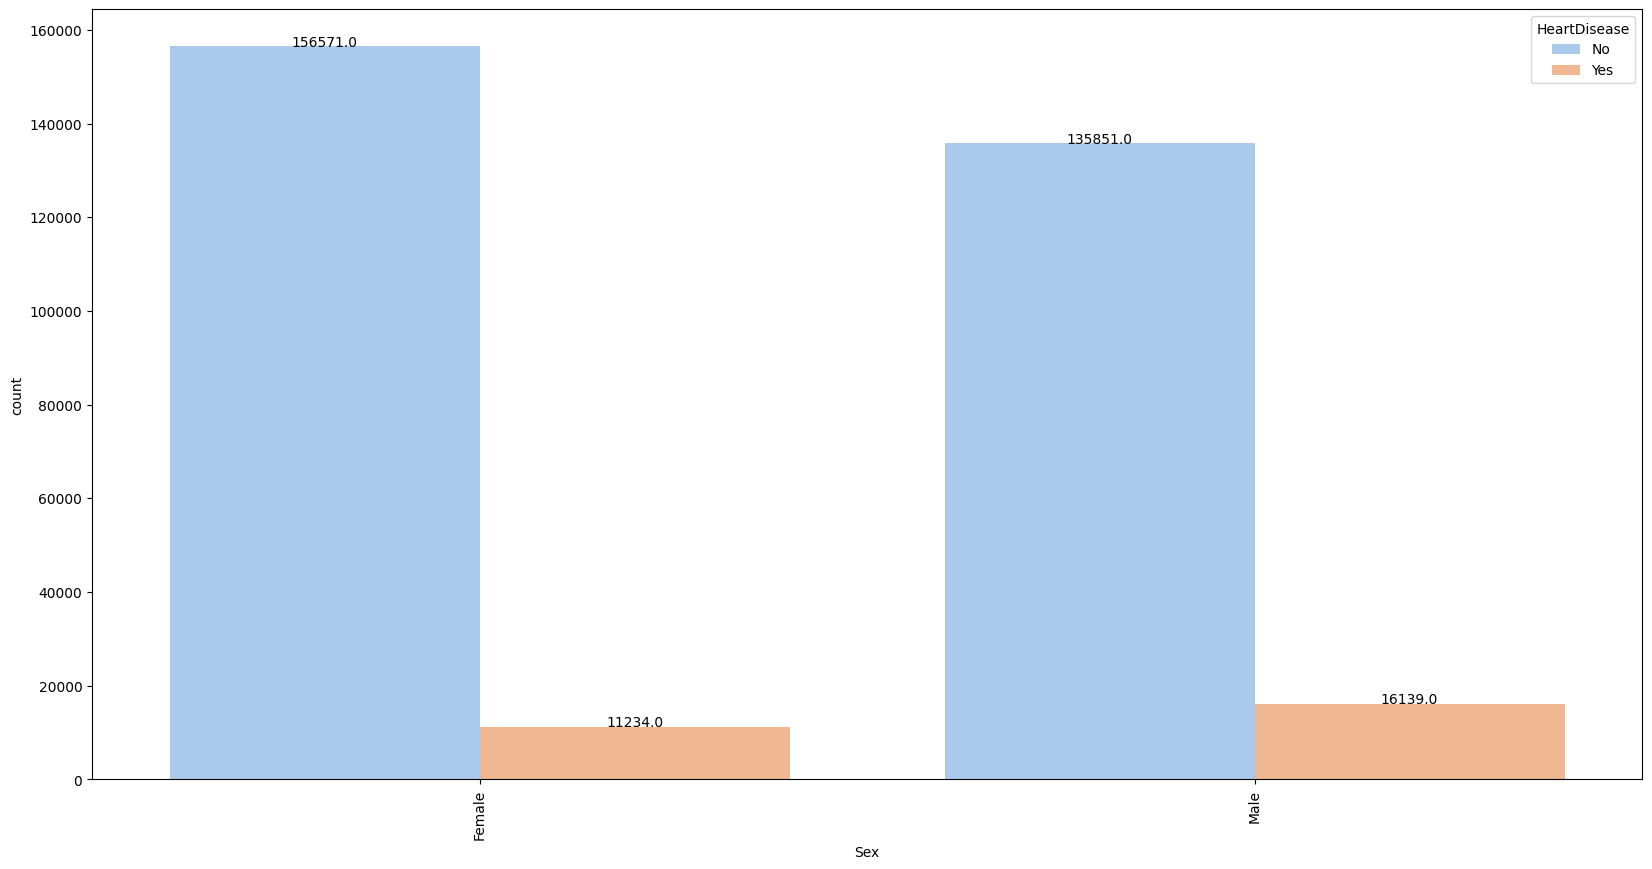

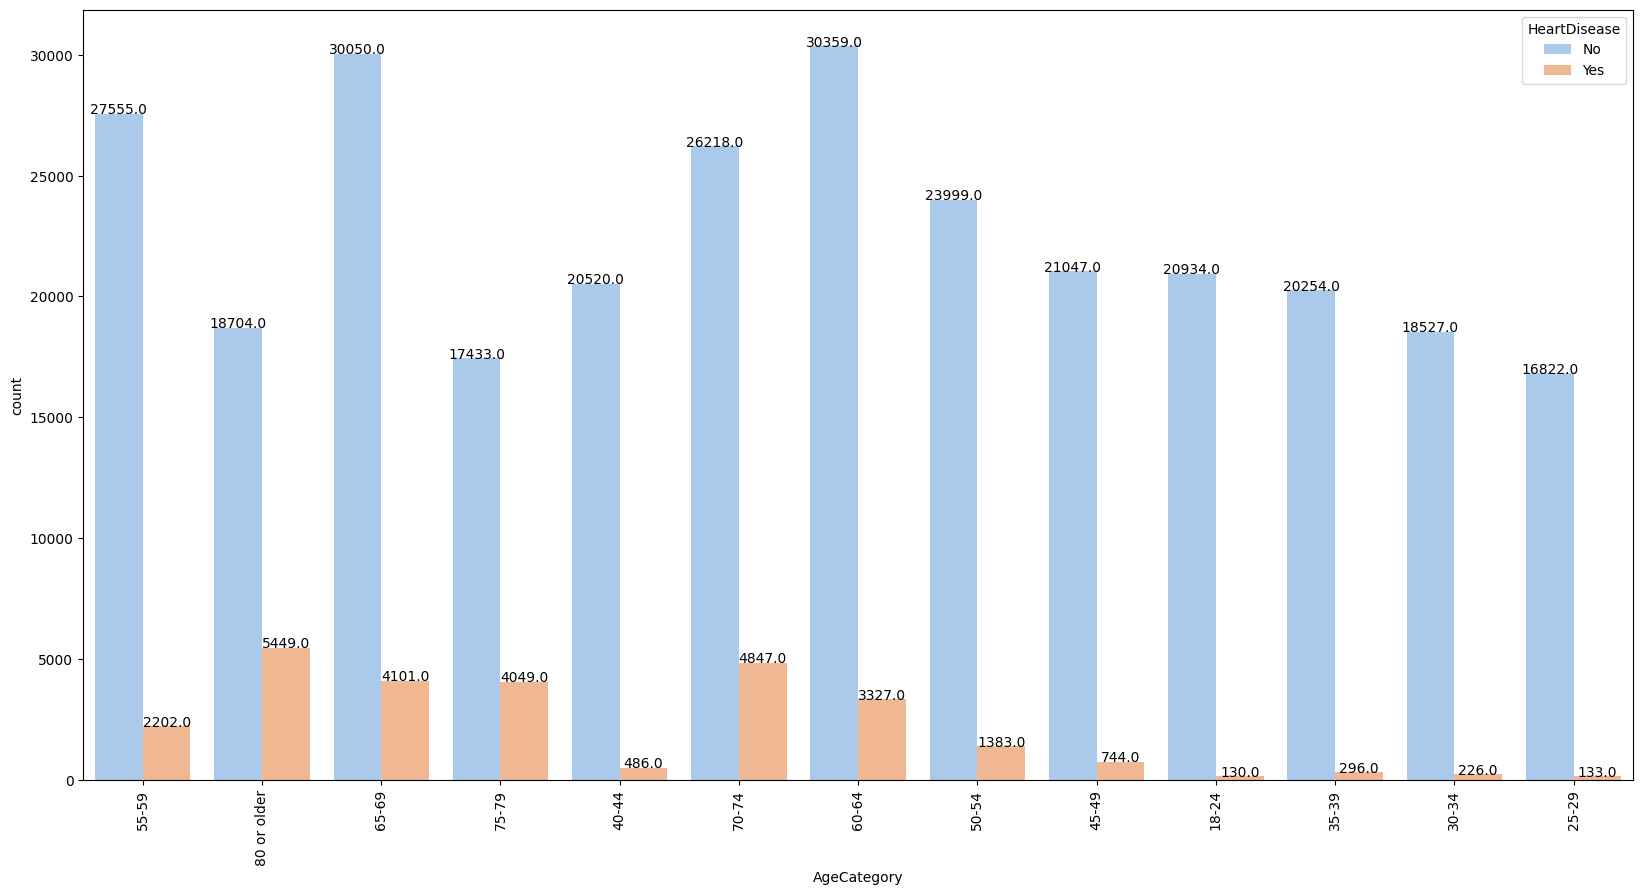

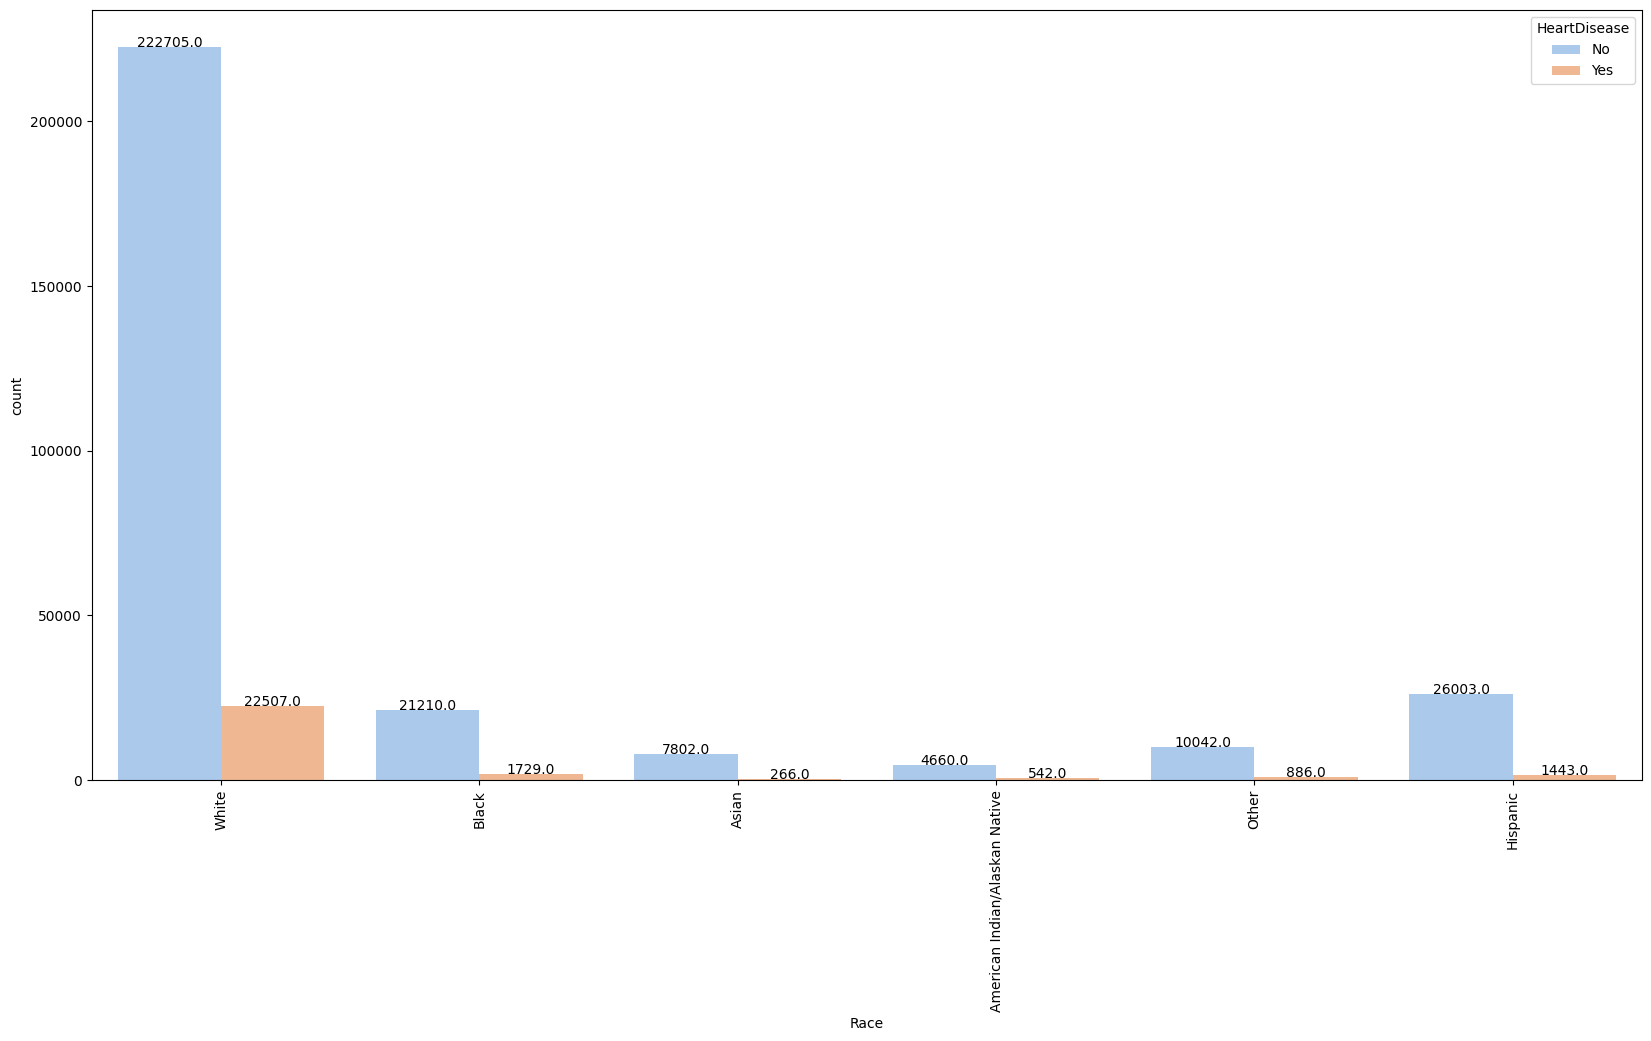

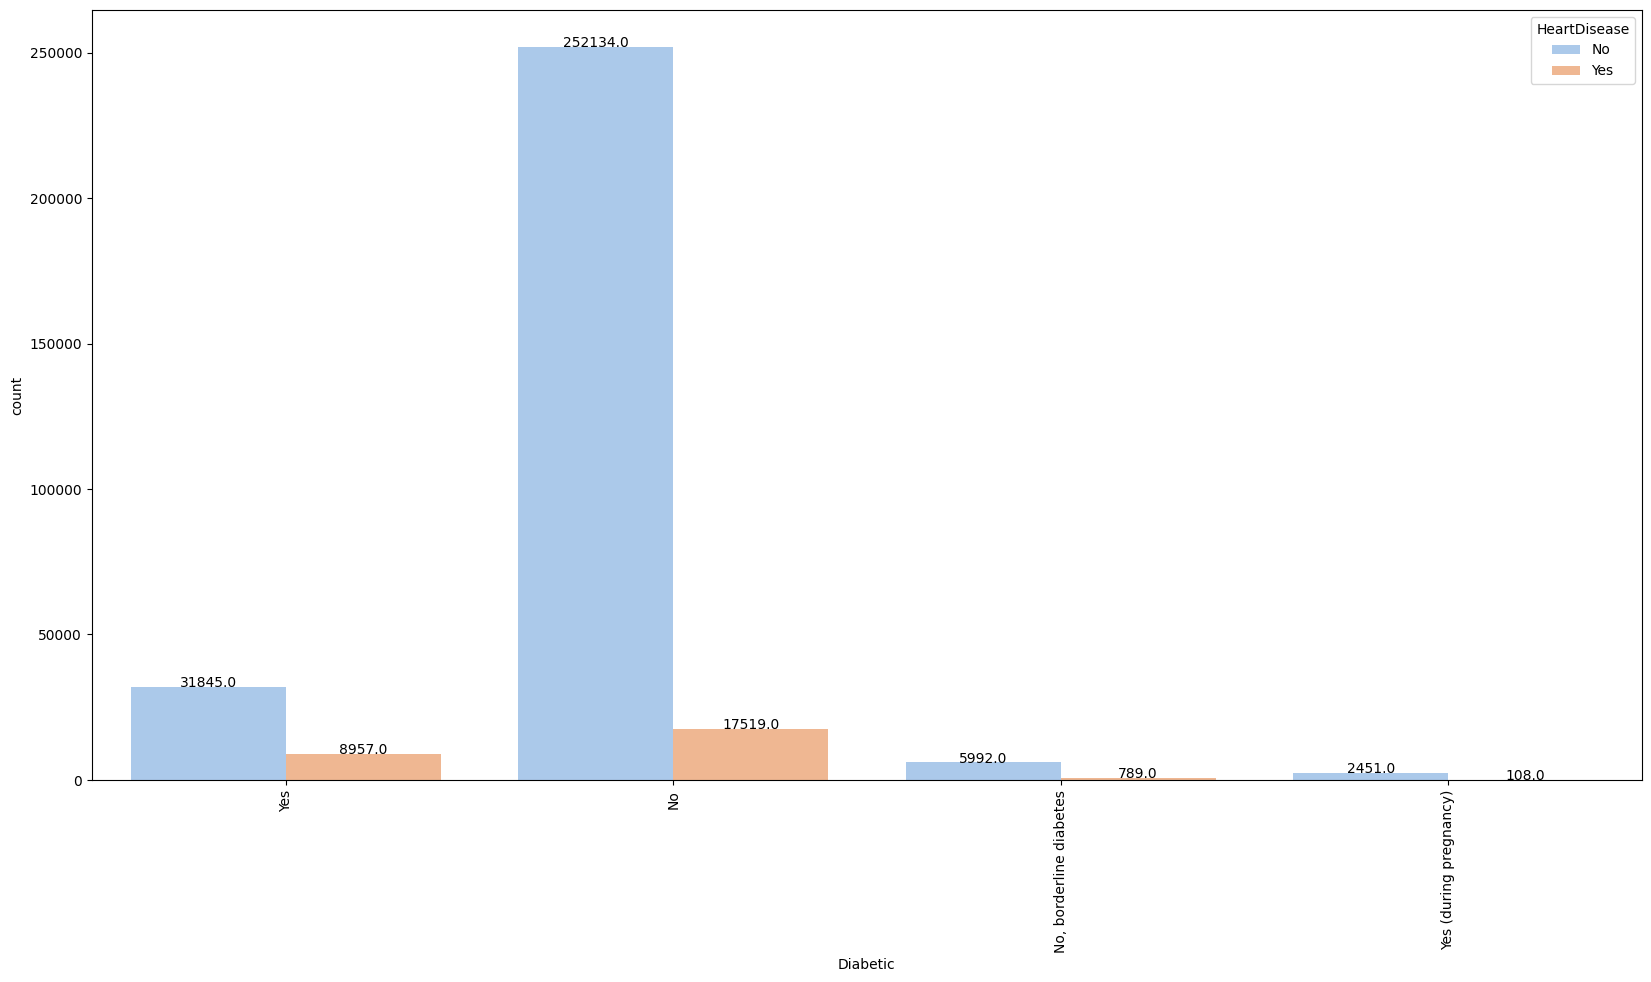

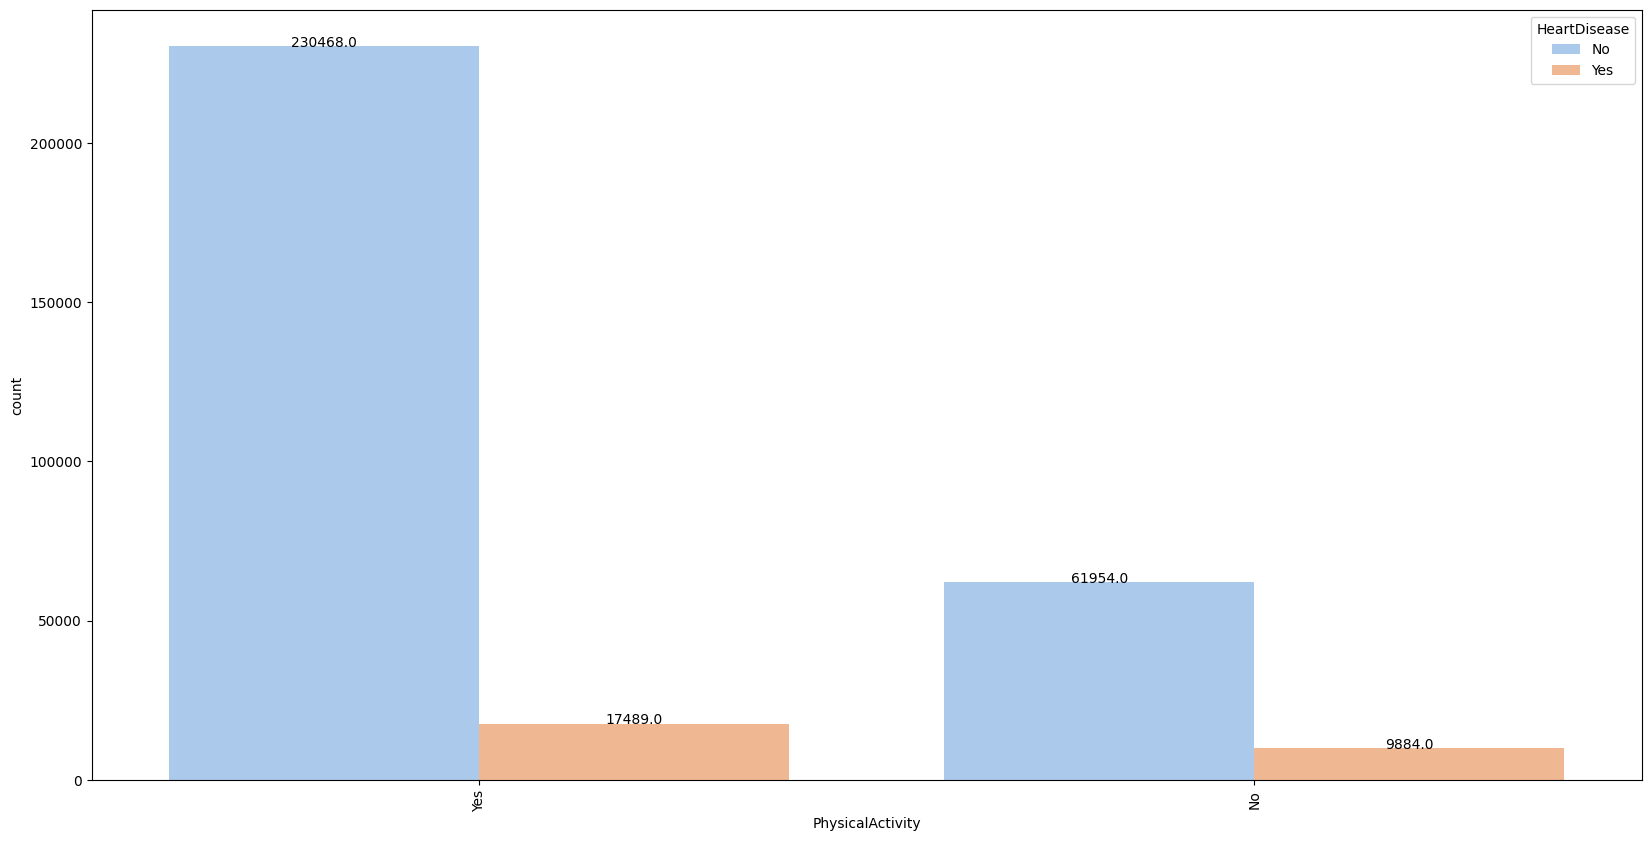

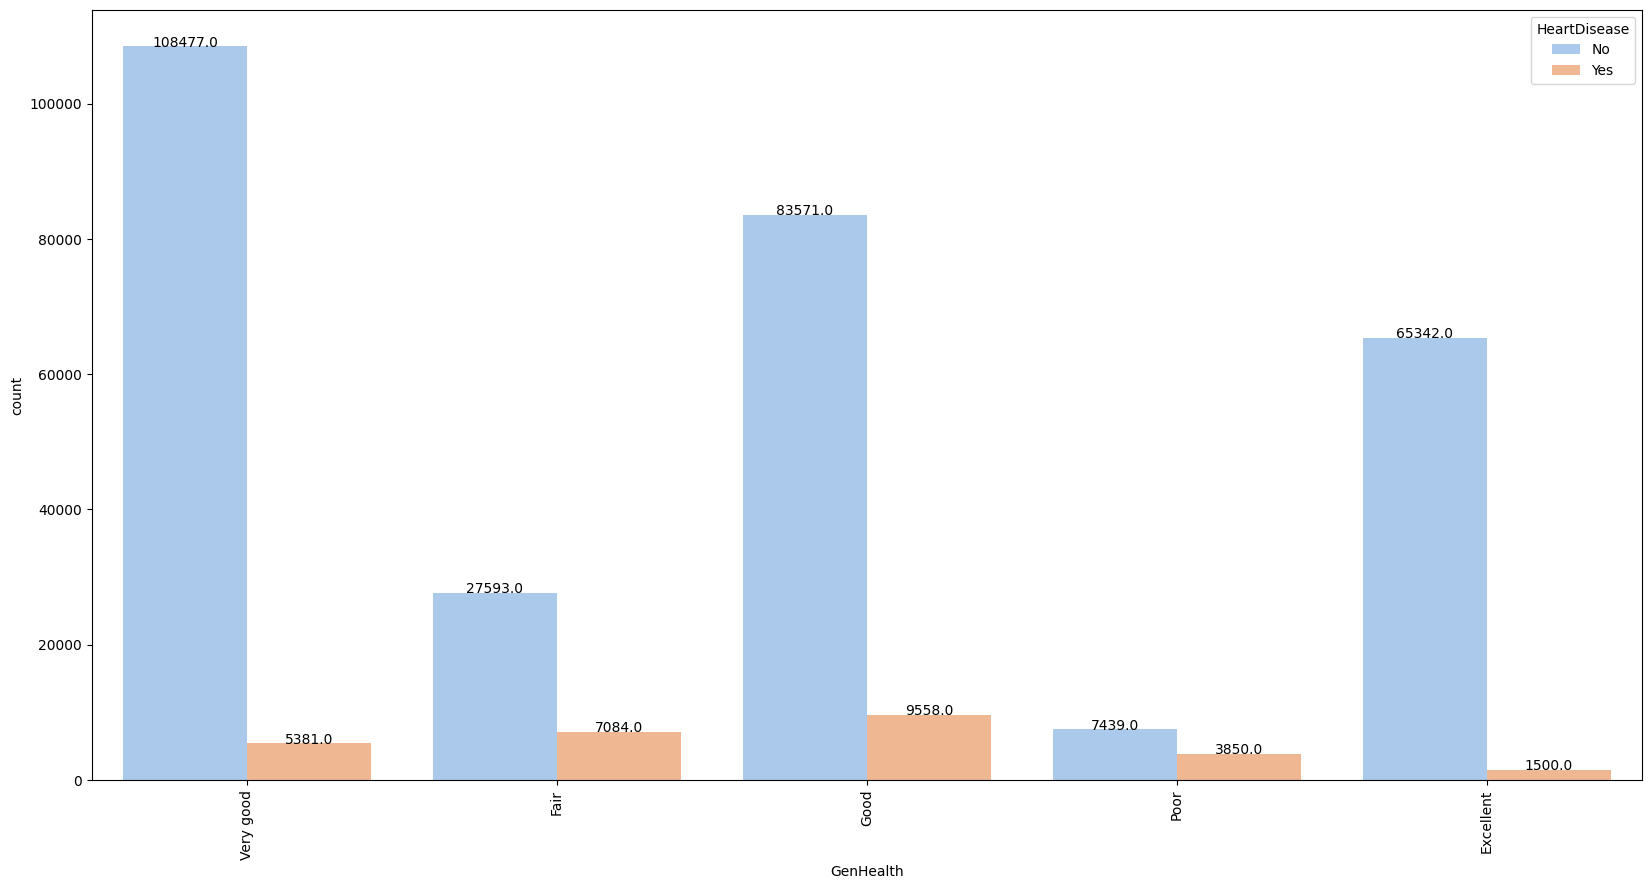

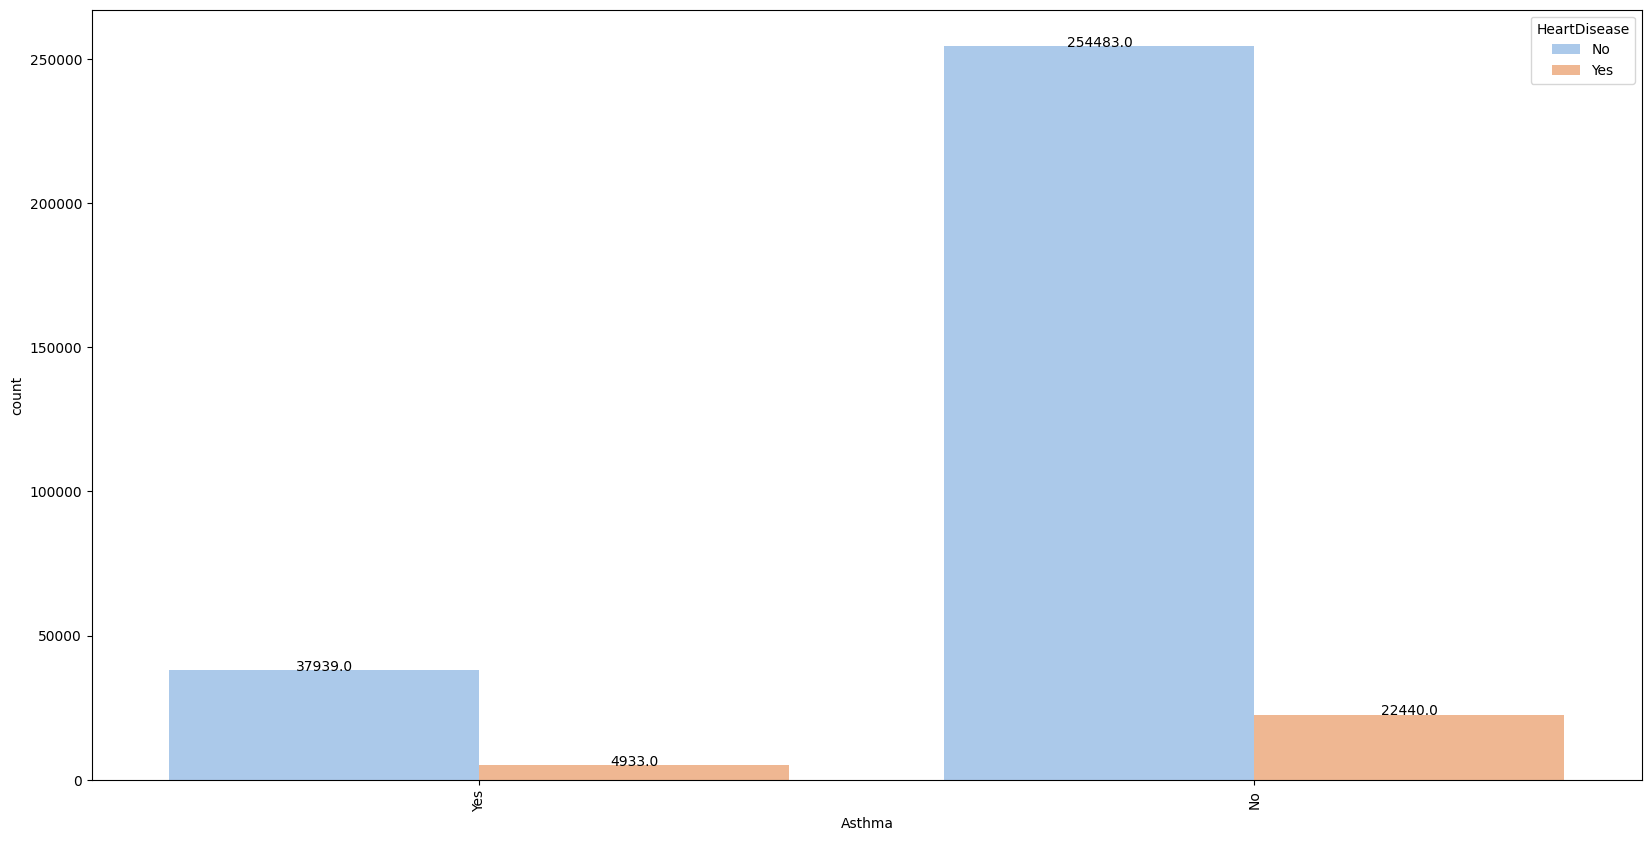

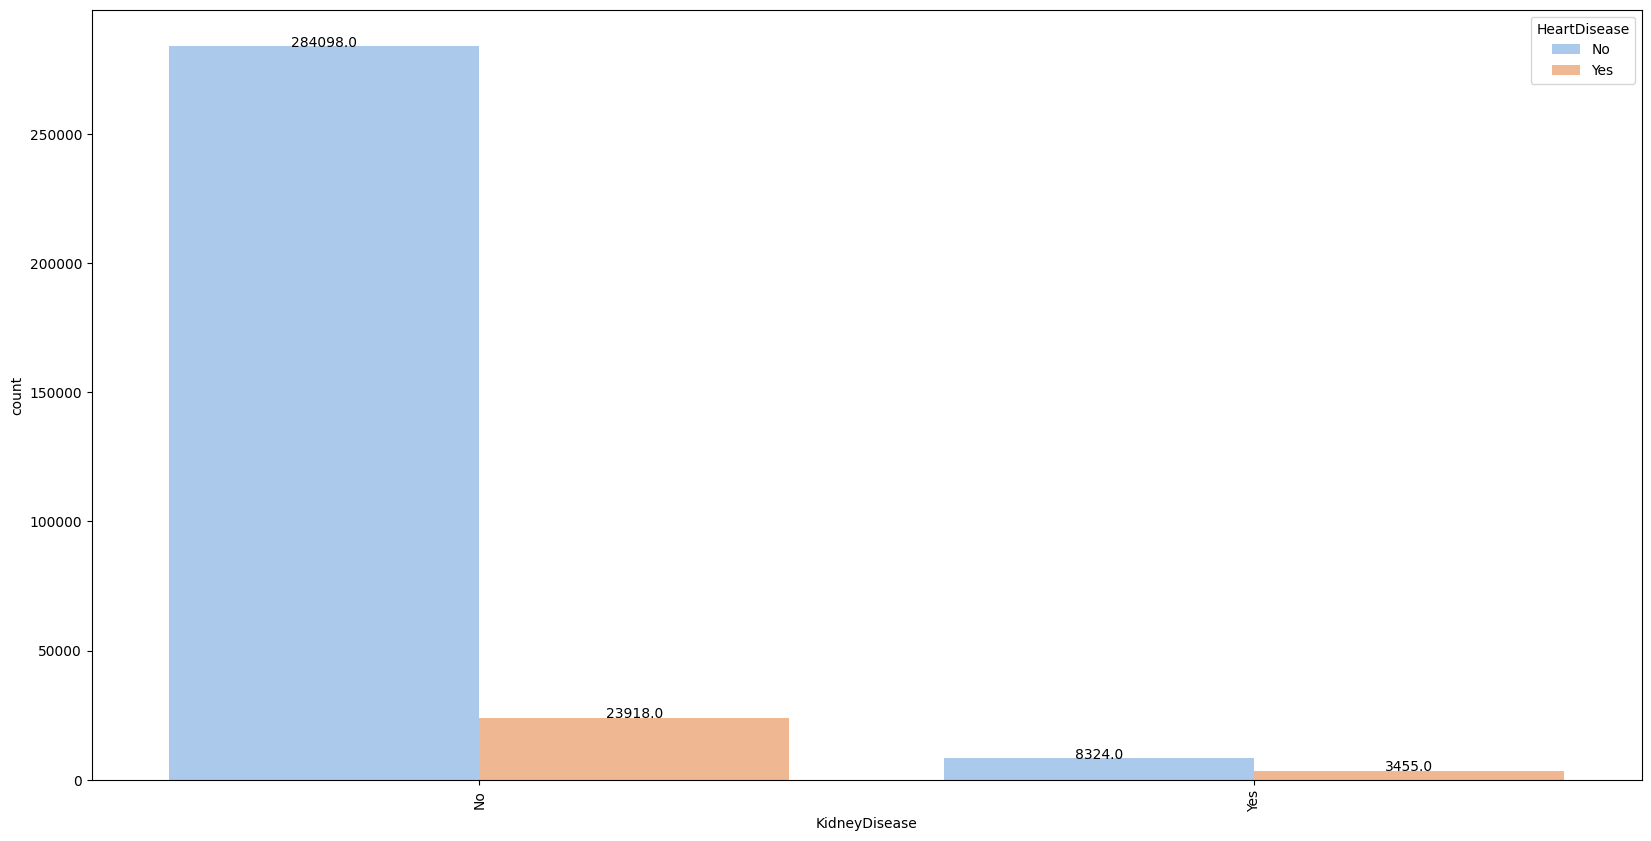

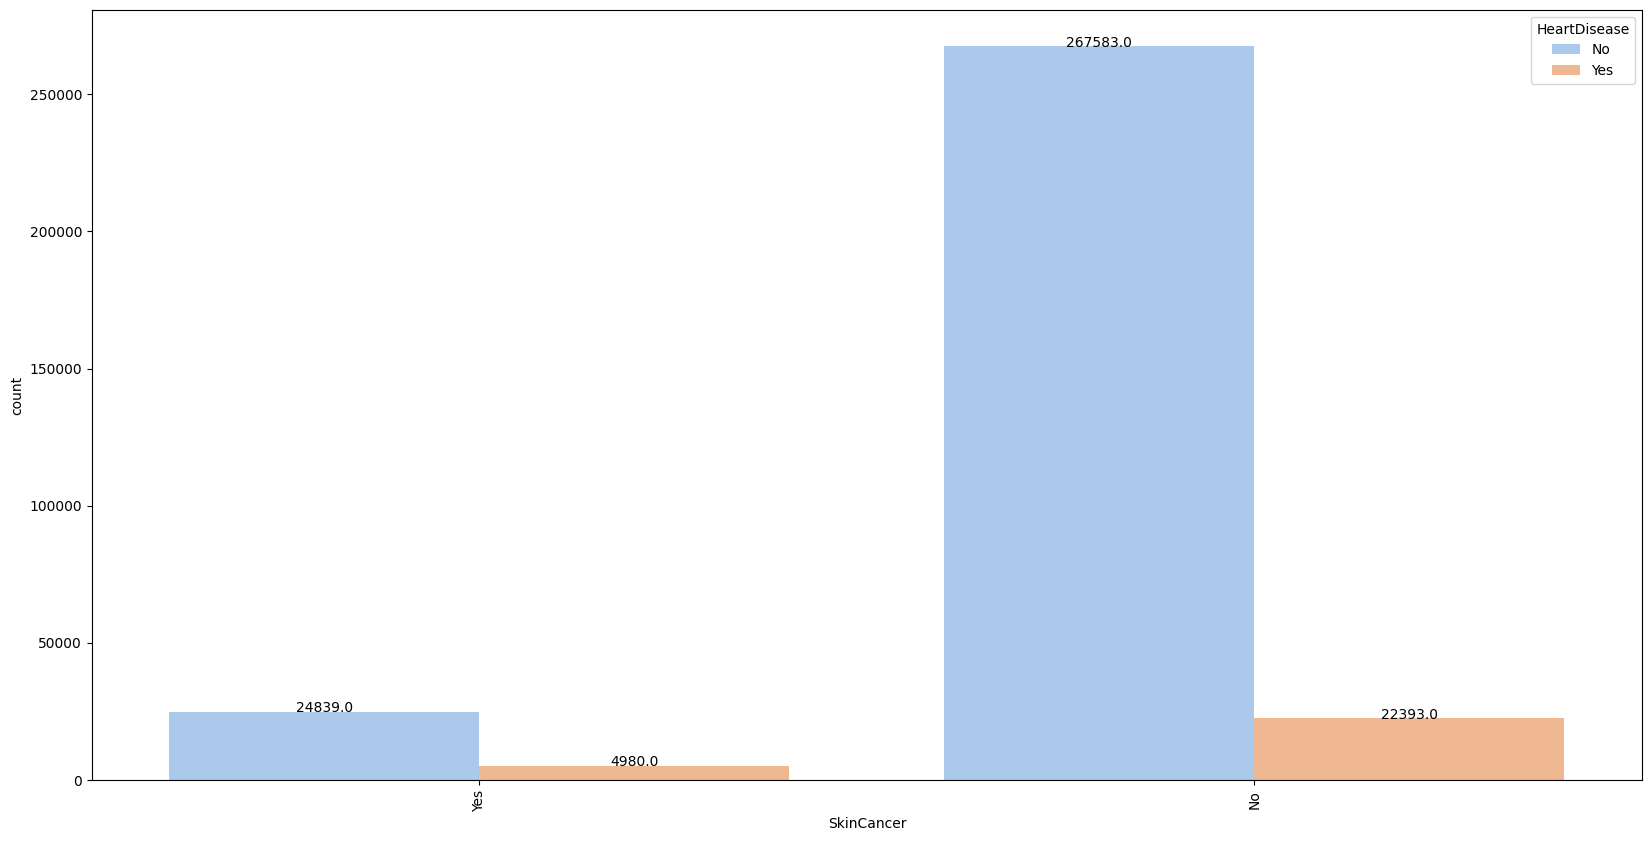

In [31]:
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = train,hue='HeartDisease',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

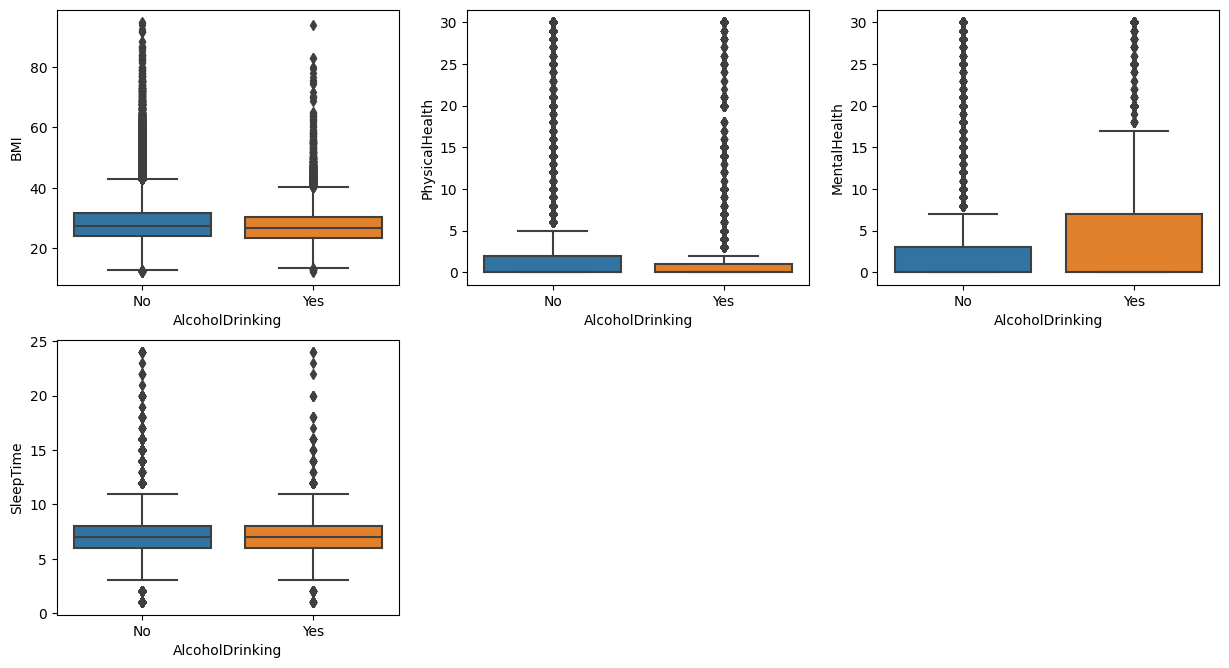

In [32]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['AlcoholDrinking'])
    i+=1

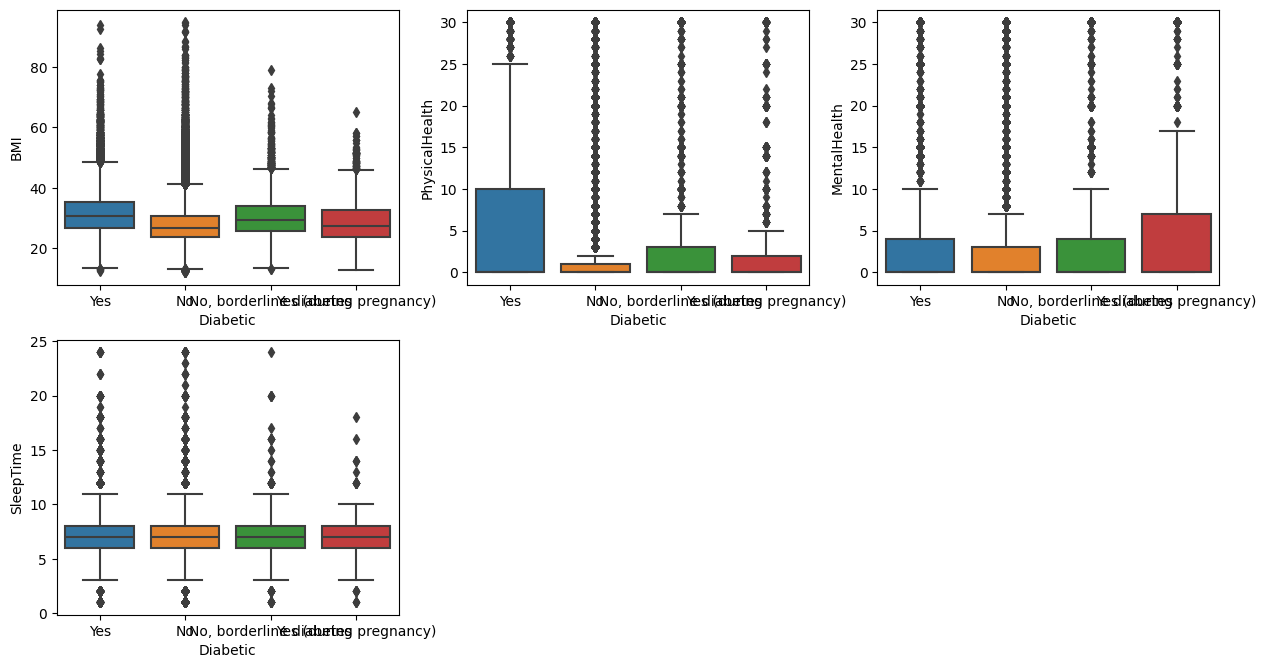

In [33]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['Diabetic'])
    i+=1

Let's transform our dataset using the OrdinalEncoder method.

In [34]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train[categorical_features])
train[categorical_features] = enc.transform(train[categorical_features])

Let's carry out the Shapiro-Wilk test to check for the normality of the distribution of numerical variables.

In [35]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
	stat, p = shapiro(train[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)


The test for normality has not been passed, therefore, to find the relationship of our variables, it is necessary to use non-parametric tests. Since we mostly have categorical variables, we use Pearson's Chi-square test to check.

The purpose of the test is to determine if two variables are related to each other.

Null hypothesis:
We start by defining the null hypothesis ( H0 ), which states that there is no relationship between the variables.
An alternative hypothesis could argue that there is a significant relationship between the two.

In [36]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(train[feature],train['HeartDisease']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 1.892352227090306e-73
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.9886131565632597e-180
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.2386144306283177e-121
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


In our dataset, there is a statistically significant relationship between the target variable and categorical features. This means that you should try to make a small prediction of the target feature.

Let's build a correlation table

In [37]:
correlation = train.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


<Axes: >

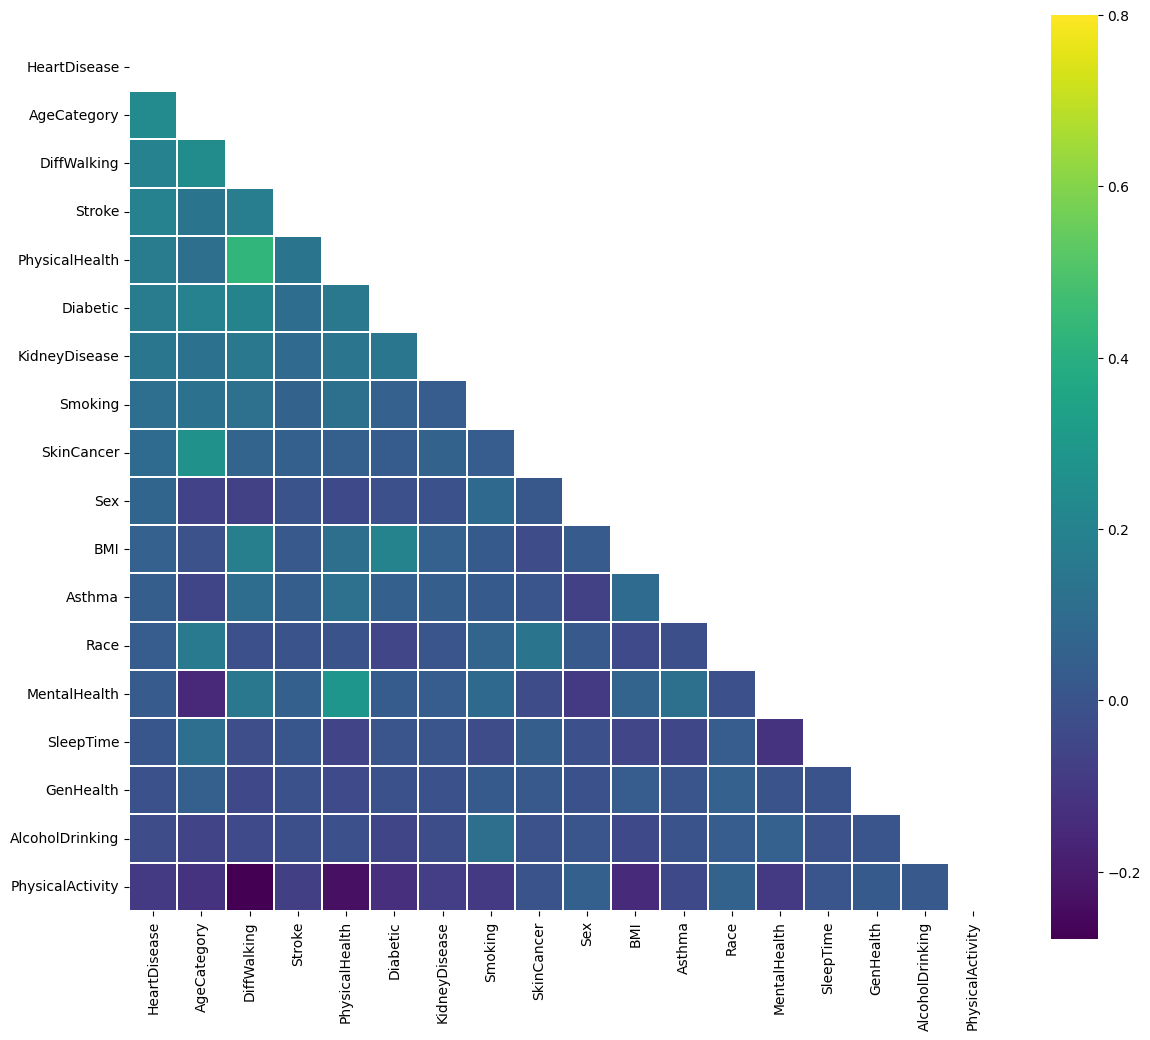

In [38]:
k= 18
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

# Machine Learning

In [39]:
#!pip install xgboost

In [40]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [41]:
y=train['HeartDisease']
train.drop('HeartDisease',axis=1,inplace=True)

In [42]:
X_train, X_test, y_train, y_test=train_test_split(train,y,test_size=0.1,random_state=42)

Let's build simple models and evaluate the quality of their training

In [43]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9027517198248906
Precission_score: 0.3271428571428571
Recall_score: 0.0798465829846583
F1-score: 0.12836322869955158
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9115697310819262
Precission_score: 0.5423728813559322
Recall_score: 0.08926080892608089
F1-score: 0.1532934131736527
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=na

High accuracy is explained by a large proportion of healthy people. When dealing with imbalanced classes, this metric is useless. More informative metrics are precission,recall. Precision can be interpreted as the proportion of objects called positive by the classifier and at the same time are really positive, and recall shows what proportion of objects of a positive class out of all objects of a positive class the algorithm found. The balance between these two metrics is F1-score. It is the introduction of precision that does not allow us to write all objects into one class, since in this case we get an increase in the False Positive level. Recall demonstrates the algorithm's ability to detect a given class in general, while precision demonstrates the ability to distinguish this class from other classes. To solve our problem, you should choose the algorithm with the highest recall, but the choice of the final algorithm is up to you. It would be possible to search for the optimal hyperparameters of the model, but since Since the problem is exploratory in nature, we will leave the search for hyperparameters for competitions.